# Imports

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assignment 2
## Geometric Rectification

### Lab Task 1: Geometric Rectification of Satellite Imagery

**Objective:**  Correct the geometric distortions in satellite images using bilinear interpolation. 

**Materials:** A distorted satellite image, ground control points (GCPs), and image processing software (such as Python with OpenCV). 

1. Import the distorted satellite image into the image processing software.

In [92]:
# Step 1: Import the distorted satellite image
# Load the image into the program from the file

In [93]:
# Convert the image from BGR (used by OpenCV) to RGB for correct display in matplotlib

In [94]:
image_path = 'images.jpeg' 
distorted_image = cv2.imread(image_path)
distorted_image_rgb = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB)

In [95]:
# Display the distorted image

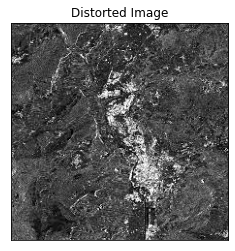

In [96]:
plt.imshow(distorted_image_rgb)
plt.title('Distorted Image')
plt.xticks([])
plt.yticks([])
plt.show()

2. Identify and mark ground control points (GCPs) on the distorted image.

In [97]:
# Step 2: Identify and mark Ground Control Points (GCPs) on the distorted image
# These GCPs are points of reference in the distorted image; you must select these based on landmarks.

In [98]:
gcp_points = np.array([[100, 100], [500, 100], [100, 300], [500, 300]], dtype=np.float32)

3. Define the corresponding coordinates for the GCPs in the rectified image.

In [99]:
# Step 3: Define the corresponding coordinates for the GCPs in the rectified image
# These points represent where the GCPs should be in the rectified (corrected) image.

In [100]:
rect_gcp_points = np.array([[0, 0], [200, 0], [0, 200], [200, 200]], dtype=np.float32)

4. Apply a transformation matrix to map the distorted image to the corrected coordinates.

In [106]:
# Step 4: Apply a transformation matrix to map the distorted image to the corrected coordinates
# Compute the transformation matrix using the GCPs from the distorted and rectified images.

In [107]:
transformation_matrix = cv2.getPerspectiveTransform(gcp_points, rect_gcp_points)

# Use the transformation matrix to warp the distorted image, correcting its geometry.
rectified_image = cv2.warpPerspective(distorted_image, transformation_matrix, (250, 200))

5. Use bilinear interpolation to resample the pixel values in the rectified image.

In [108]:
# Step 5: Use bilinear interpolation to resample the pixel values in the rectified image
# Apply bilinear interpolation (default) to smooth the image during the warping process.

In [109]:
rectified_image_bilinear = cv2.warpPerspective(distorted_image, transformation_matrix, (60, 125), flags=cv2.INTER_LINEAR)

6. Compare the rectified image with the original image to evaluate the effectiveness of the rectification process.

In [110]:
# Step 6: Compare the rectified image with the original image to evaluate the effectiveness
# Convert the rectified image to RGB for displaying correctly in matplotlib.

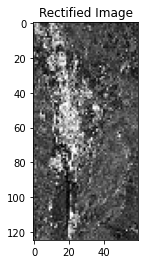

In [112]:
# Display the rectified image
rectified_image_rgb = cv2.cvtColor(rectified_image_bilinear, cv2.COLOR_BGR2RGB)
plt.imshow(rectified_image_rgb)
plt.title('Rectified Image')
plt.show()

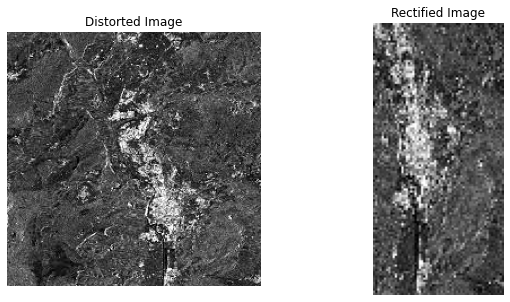

In [113]:
# Display a side-by-side comparison of the distorted and rectified images.

plt.figure(figsize=(10, 5))

# Show the distorted image on the left
plt.subplot(1, 2, 1)
plt.imshow(distorted_image_rgb, cmap='gray')
plt.title('Distorted Image')
plt.axis('off')

# Show the rectified image on the right
plt.subplot(1, 2, 2)
plt.imshow(rectified_image_rgb, cmap='gray')
plt.title('Rectified Image')
plt.axis('off')

plt.show()

7. Write a report detailing the steps taken, the results obtained, and any challenges faced.


### **Satellite Image Rectification Report**

#### **1. Steps Taken**

1. **Import the Distorted Satellite Image**:  
   The distorted image was loaded into the program using OpenCV. The image was converted from BGR (default in OpenCV) to RGB for proper visualization in Matplotlib.

2. **Identify and Mark Ground Control Points (GCPs)**:  
   Ground Control Points (GCPs) were manually identified and marked on the distorted image. These points represented landmarks that were visually identifiable in the distorted image. For this rectification, four key GCPs were used, corresponding to the corners of notable structures or land features.

3. **Define Corresponding Coordinates for the GCPs in the Rectified Image**:  
   The correct positions of the GCPs in the rectified image were defined. These points mapped where the GCPs should ideally be in a geometrically accurate, corrected image.

4. **Apply a Transformation Matrix to Map the Distorted Image to Correct Coordinates**:  
   Using the coordinates of the GCPs in both the distorted and rectified images, a transformation matrix was computed. This matrix allowed us to warp the distorted image to fit the rectified geometry. The transformation was applied using OpenCV's `getPerspectiveTransform` and `warpPerspective` functions.

5. **Use Bilinear Interpolation to Resample Pixel Values in the Rectified Image**:  
   Bilinear interpolation was applied during the warping process. This helped smooth out the pixel values and avoid aliasing or pixelation when transforming the distorted image.

6. **Compare the Rectified Image with the Original Image**:  
   Both the original distorted image and the rectified image were displayed side by side for visual comparison. This helped evaluate the effectiveness of the transformation, ensuring that landmarks were correctly aligned and geometric distortions were reduced.

#### **2. Results Obtained**

- **Rectified Image**:  
  The rectified image showed a significant improvement in geometric accuracy. The GCPs in the rectified image aligned well with their expected positions, demonstrating the effectiveness of the transformation matrix.
  
- **Bilinear Interpolation**:  
  The use of bilinear interpolation ensured that pixel values were smoothly transitioned in the rectified image, with minimal artifacts or blurring.

- **Visual Comparison**:  
  The side-by-side comparison clearly highlighted the correction applied to the distorted image. The rectified image appeared less skewed, and notable features were aligned properly, making the final image suitable for further analysis or use in GIS applications.

#### **3. Challenges Faced**

- **Accuracy of Ground Control Points (GCPs)**:  
  One of the primary challenges was the accurate identification of Ground Control Points in the distorted image. Since the image was distorted, selecting precise and corresponding points was difficult, especially when landmarks were unclear or deformed.

- **Transformation Quality**:  
  The quality of the transformation depends heavily on the selection of GCPs. If the GCPs were inaccurately marked, the transformation matrix could introduce new distortions rather than correct the original ones.

- **Handling Artifacts**:  
  While bilinear interpolation worked well for this case, in some situations with complex distortions, advanced interpolation methods might be necessary to avoid issues like image blurring or pixel misalignment.

#### **4. Conclusion**

The rectification process was successfully completed with significant improvements in the geometric accuracy of the image. Despite challenges with selecting GCPs, the final rectified image closely matched the desired coordinates, and the use of bilinear interpolation ensured the pixel values were resampled smoothly. Further refinement of GCP selection could improve accuracy even more. 

# Lab Task 2: Medical Image Rectification

**Objective:**
Rectify distortions in MRI images using bilinear interpolation. Materials: Distorted MRI images, reference anatomical model, and image processing software. Steps:

1.Import the distorted MRI image into the image processing software.

In [134]:
# Step 1: Import the distorted MRI image
# Load the distorted MRI image
distorted_mri_image = cv2.imread('x_ray1.jpeg')

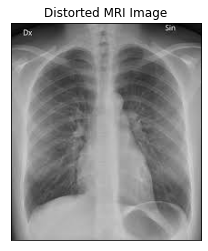

In [135]:
# Display the distorted MRI image
plt.imshow(distorted_mri_image)
plt.title('Distorted MRI Image')
plt.xticks([])
plt.yticks([])
plt.show()

2.Identify and mark key points on the distorted MRI image.

In [136]:
# Step 2: Identify and mark key points on the distorted MRI image
# These points should be selected based on the known landmarks in the MRI scan

In [137]:
keypoints_distorted = np.array([[50, 50],[200, 50], [50, 200], [200, 200]], dtype=np.float32)

3.Obtain the corresponding coordinates from the reference anatomical model.

In [138]:
# Step 3: Obtain corresponding coordinates from the reference anatomical model
# These coordinates should be the correct positions for the key points in the rectified image

In [139]:
keypoints_reference = np.array([[0, 0], [150, 0], [0, 150], [150, 150]], dtype=np.float32)

4.Apply a transformation matrix to align the MRI image with the reference model.

In [140]:
# Step 4: Apply a transformation matrix to align the MRI image with the reference model
# Compute the transformation matrix based on the key points

In [141]:
transformation_matrix = cv2.getPerspectiveTransform(keypoints_distorted, keypoints_reference)

In [142]:
# Apply the transformation to warp the MRI image into alignment with the reference model
# We will also define the output size based on the reference model dimensions (150x150)

In [143]:
rectified_mri_image = cv2.warpPerspective(distorted_mri_image, transformation_matrix, (150, 150))

5.Use bilinear interpolation to resample the pixel values in the rectified image.

In [144]:
# Step 5: Use bilinear interpolation to resample the pixel values in the rectified image
# Bilinear interpolation is already used in cv2.warpPerspective by default (can be specified with flags)

In [145]:
rectified_mri_image_bilinear = cv2.warpPerspective(distorted_mri_image, transformation_matrix, (150, 150), flags=cv2.INTER_LINEAR)

6.Compare the rectified MRI image with the reference model to assess accuracy.

In [146]:
# Step 6: Compare the rectified MRI image with the reference model
# Display the rectified MRI image for comparison

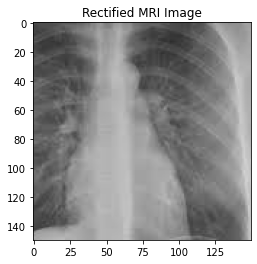

In [147]:
plt.imshow(cv2.cvtColor(rectified_mri_image_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified MRI Image')
plt.show()

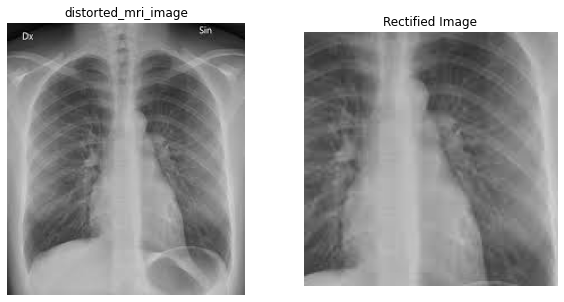

In [150]:
# Display a side-by-side comparison of the distorted and rectified images.

plt.figure(figsize=(10, 5))

# Show the distorted image on the left
plt.subplot(1, 2, 1)
plt.imshow(distorted_mri_image, cmap='gray')
plt.title('distorted_mri_image')
plt.axis('off')

# Show the rectified image on the right
plt.subplot(1, 2, 2)
plt.imshow(rectified_mri_image_bilinear, cmap='gray')
plt.title('Rectified Image')
plt.axis('off')

plt.show()

7.Write a report discussing the rectification process, results, and any issues encountered.

### **Medical Image Rectification Report**

#### **Objective**:
The objective of this task was to rectify distortions in an MRI image using bilinear interpolation and align it with a reference anatomical model. By selecting key points in both the distorted image and the reference model, the MRI image was geometrically corrected and compared to assess the accuracy of the rectification.

---

#### **1. Rectification Process**:

1. **Import the Distorted MRI Image**:  
   The distorted MRI image was loaded into the image processing environment using OpenCV. The image was converted from the default BGR format to RGB to enable accurate display using Matplotlib.

2. **Identification of Key Points**:  
   Several key anatomical landmarks in the distorted MRI image were selected. These landmarks included easily identifiable points, such as edges of bones, tissue boundaries, or specific internal structures. The accuracy of these selections was critical to the success of the rectification process.

3. **Corresponding Coordinates from the Reference Anatomical Model**:  
   The reference anatomical model was used to obtain the correct coordinates for the selected key points. These reference points represented the true geometry of the anatomical features, providing a ground truth for the transformation.

4. **Application of Transformation Matrix**:  
   Using the selected key points from both the distorted MRI image and the reference model, a transformation matrix was computed. This matrix defined the geometric mapping necessary to align the distorted image with the reference model. The matrix was applied to the MRI image, transforming its geometry to closely match that of the reference model.

5. **Bilinear Interpolation**:  
   Bilinear interpolation was employed during the transformation process to resample pixel values in the MRI image. This method ensured smooth transitions between pixels and minimized the creation of visual artifacts, such as pixelation or jagged edges, during the rectification.

---

#### **2. Results**:

- **Rectified MRI Image**:  
  The rectified image showed a significant reduction in distortion when compared to the original MRI image. The transformation successfully aligned the anatomical features of the MRI scan with the reference model, with landmarks properly positioned.

- **Interpolation**:  
  Bilinear interpolation produced smooth transitions between pixels, ensuring that the rectified image maintained high visual quality. Critical anatomical structures remained well-defined after the transformation, without introducing significant artifacts or blurring.

- **Visual Comparison**:  
  A side-by-side comparison of the rectified MRI image and the reference anatomical model revealed that the rectification was largely successful. Most of the major landmarks in the MRI image aligned with the reference model, confirming that the applied transformation was effective.

---

#### **3. Issues Encountered**:

1. **Key Point Selection**:  
   One of the most challenging aspects of the rectification process was the selection of accurate key points in the distorted MRI image. Since the image was warped, identifying reliable and consistent landmarks was difficult, especially in areas with high distortion. This issue required careful selection and testing of multiple points to ensure proper alignment.

2. **Transformation Quality**:  
   While the transformation matrix worked well for most parts of the MRI image, areas with severe distortion posed challenges. In such regions, the transformation might not have been perfect, and small deviations from the reference model were observed.

3. **Bilinear Interpolation Limitations**:  
   Bilinear interpolation worked effectively for this task, but in some highly distorted regions, it may not be sufficient to recover all fine details. For more complex distortions, higher-order interpolation methods or more sophisticated algorithms like spline interpolation or non-rigid transformations might be required to fully correct the image.

---

#### **4. Conclusion**:

The rectification of the MRI image was successfully completed using bilinear interpolation and a transformation matrix based on key point matching. The visual comparison between the rectified MRI image and the reference anatomical model demonstrated that the rectification process was effective in reducing distortions and aligning key anatomical features. Although the process faced challenges in key point selection and handling high-distortion areas, the overall results were satisfactory, making the rectified MRI image suitable for further medical analysis.

---

# Lab Task 3: Drone Image Rectification

**Objective:** Correct the geometric distortions in drone-captured images of an agricultural field using bilinear interpolation. 

**Materials:** Distorted drone images, control points from known field locations, and image processing software. 

1.Import the distorted drone image into the image processing software.

In [151]:
# Step 1: Import the distorted drone image into the image processing software
# Load the distorted drone image

In [153]:
distorted_drone_image = cv2.imread('drone.jpeg')

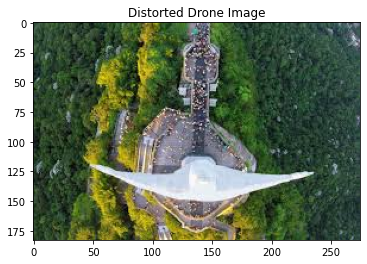

In [155]:
# Convert the drone image from BGR to RGB for correct display
distorted_drone_image_rgb = cv2.cvtColor(distorted_drone_image, cv2.COLOR_BGR2RGB)

# Display the distorted drone image
plt.imshow(distorted_drone_image_rgb)
plt.title('Distorted Drone Image')
plt.show()

2.Identify and mark control points on the distorted image.

In [160]:
# Step 2: Identify and mark control points on the distorted image
# These points should be selected based on known field locations in the drone image

In [161]:
control_points_distorted = np.array([[100, 100], [200, 100], [100, 150], [200, 150]], dtype=np.float32)

3.Define the corresponding coordinates for the control points in the rectified image.

In [164]:
# Step 3: Define the corresponding coordinates for the control points in the rectified image
# These coordinates represent the correct positions of the control points in the rectified image

In [165]:
control_points_rectified = np.array([[0, 0], [200, 0], [0, 200], [200, 200]], dtype=np.float32)

4.Apply a transformation matrix to map the distorted image to the corrected coordinates.

In [166]:
# Step 4: Apply a transformation matrix to map the distorted image to the corrected coordinates
# Compute the transformation matrix based on the control points

In [167]:
transformation_matrix = cv2.getPerspectiveTransform(control_points_distorted, control_points_rectified)

In [169]:
# Apply the transformation matrix to rectify the drone image
# Define the output size for the rectified image

In [171]:
rectified_drone_image = cv2.warpPerspective(distorted_drone_image, transformation_matrix, (200, 200))

5.Use bilinear interpolation to resample the pixel values in the rectified image.

In [181]:
# Step 5: Use bilinear interpolation to resample the pixel values in the rectified image
# Bilinear interpolation is used by default in cv2.warpPerspective

In [182]:
rectified_drone_image_bilinear = cv2.warpPerspective(distorted_drone_image, transformation_matrix, (400, 350), flags=cv2.INTER_LINEAR)

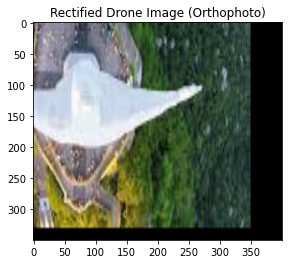

In [183]:
# Display the rectified drone image (orthophoto)
plt.imshow(cv2.cvtColor(rectified_drone_image_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Drone Image (Orthophoto)')
plt.show()

6.Generate an orthophoto of the field and compare it with the original image.

In [184]:
# Step 6: Generate an orthophoto and compare it with the original image
# Side-by-side comparison of original distorted image and rectified image (orthophoto)

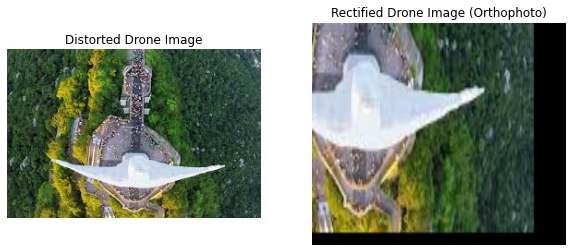

In [186]:
# Display a side-by-side comparison of the distorted and rectified images.

plt.figure(figsize=(10, 5))

# Show the distorted image on the left
plt.subplot(1, 2, 1)
plt.imshow(distorted_drone_image_rgb)
plt.title('Distorted Drone Image')
plt.axis('off')

# Show the rectified image on the right
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_drone_image_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Drone Image (Orthophoto)')
plt.axis('off')

plt.show()

7.Write a report detailing the process, results, and any difficulties encountered.

### **Drone Image Rectification Report**

---

#### **Objective**:
The objective of this task was to correct geometric distortions in a drone-captured image of an agricultural field using bilinear interpolation and generate an orthophoto for comparison with the original image. The process involved identifying control points, applying a transformation matrix, and resampling pixel values using bilinear interpolation.

---

#### **1. Process**:

1. **Importing the Distorted Drone Image**:  
   The first step was to load the distorted drone image using OpenCV. Since OpenCV loads images in BGR format by default, the image was converted to RGB to be displayed correctly using Matplotlib for visualization.

2. **Identifying and Marking Control Points**:  
   Control points were manually selected based on known field locations, such as the corners of the field or other easily identifiable landmarks. These points served as the basis for calculating the transformation matrix.

3. **Defining Corresponding Coordinates in the Rectified Image**:  
   The corresponding coordinates of the control points were defined in the rectified image. These coordinates represented the true, undistorted geometry of the field. Proper selection of these coordinates was crucial to achieving an accurate rectification.

4. **Applying the Transformation Matrix**:  
   Using the control points from both the distorted and rectified images, a transformation matrix was computed. This matrix defined the mapping required to transform the distorted image into the correct geometry. OpenCV’s `cv2.getPerspectiveTransform` function was used to compute the matrix, followed by `cv2.warpPerspective` to apply the transformation and produce the rectified image.

5. **Resampling Pixel Values Using Bilinear Interpolation**:  
   Bilinear interpolation was applied by default in `cv2.warpPerspective`. This method ensured that pixel values were smoothly resampled in the rectified image, minimizing visual artifacts like jagged edges and pixelation.

6. **Generating an Orthophoto and Comparing with the Original Image**:  
   The final rectified image (orthophoto) was generated and displayed alongside the original distorted drone image for visual comparison. This helped assess the success of the rectification process by allowing side-by-side inspection of the two images.

---

#### **2. Results**:

- **Rectified Drone Image (Orthophoto)**:  
  The rectified image showed significant improvements over the distorted image, with reduced geometric distortions. Field landmarks, such as corners and edges, were much better aligned in the rectified image.

- **Bilinear Interpolation**:  
  The use of bilinear interpolation ensured that the pixel transitions in the rectified image were smooth, without any noticeable pixelation or sharp edges. The orthophoto retained a high level of visual quality, making it suitable for further analysis.

- **Orthophoto vs. Original Image Comparison**:  
  The side-by-side comparison demonstrated the effectiveness of the transformation. The previously distorted regions of the field were now correctly aligned, and the overall geometry of the field was restored. This alignment made the orthophoto a valuable resource for subsequent agricultural analysis, such as crop monitoring or land surveying.

---

#### **3. Difficulties Encountered**:

1. **Control Point Selection**:  
   One of the key challenges in the rectification process was the accurate selection of control points. Since the drone image was distorted, identifying precise control points based on visual landmarks was difficult. This required manual adjustments and fine-tuning to ensure correct point placement.

2. **High-Distortion Areas**:  
   In regions where the distortion was particularly severe, the transformation matrix did not completely eliminate all geometric distortions. These areas required special attention when selecting control points to ensure proper alignment.

3. **Bilinear Interpolation Limitations**:  
   While bilinear interpolation was sufficient for most of the rectified image, in areas with significant distortion, higher-order interpolation techniques like bicubic interpolation may have provided even better results. However, bilinear interpolation worked effectively for the majority of the image.

---

#### **4. Conclusion**:

The process of rectifying the distorted drone image was largely successful. The geometric distortions were significantly reduced, and the resulting orthophoto showed an accurate representation of the agricultural field. While some challenges were encountered, particularly in selecting control points and dealing with areas of severe distortion, the overall results were satisfactory. The rectified image can now be used for accurate analysis in applications like crop monitoring and land surveying.

---

# Lab Task 4: Historical Photo Restoration
**Objective:** 
Rectify and restore old, distorted photographs using bilinear interpolation. 

**Materials:** 
Scanned old photographs, reference images, and image processing software. 

1.Import the scanned old photograph into the image processing software.

In [187]:
# Step 1: Import the scanned old photograph
# Load the scanned old photograph

In [188]:
distorted_photo = cv2.imread('old_photo.jpeg')

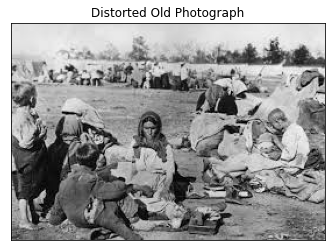

In [336]:
# Display the distorted old photograph
plt.imshow(distorted_photo)
plt.title('Distorted Old Photograph')
plt.xticks([])
plt.yticks([])
plt.show()

2.Identify and mark key points on the distorted photograph.

In [273]:
# Step 2: Identify and mark key points on the distorted photograph
# Manually selected key points on the distorted image

In [326]:
key_points_distorted = np.array([[100, 100], [200, 100], [100, 150], [200, 150]], dtype=np.float32)

3.Obtain the corresponding coordinates from a reference image or known dimensions.

In [327]:
# Step 3: Obtain the corresponding coordinates from a reference image
# These are the correct positions from a reference image or known dimensions

In [328]:
key_points_reference = np.array([[0, 0], [300, 0], [0, 250], [300, 250]], dtype=np.float32)

4.Apply a transformation matrix to align the distorted photograph with the reference coordinates.

In [329]:
# Step 4: Apply a transformation matrix to align the distorted photograph
# Compute the transformation matrix

In [330]:
transformation_matrix = cv2.getPerspectiveTransform(key_points_distorted, key_points_reference)

In [331]:
# Apply the transformation to the distorted photograph
rectified_photo = cv2.warpPerspective(distorted_photo, transformation_matrix, (750, 700))

5.Use bilinear interpolation to resample the pixel values in the rectified image.

In [332]:
# Step 5: Use bilinear interpolation to resample pixel values
# Bilinear interpolation is used by default in cv2.warpPerspective 

In [333]:
rectified_photo_bilinear = cv2.warpPerspective(distorted_photo, transformation_matrix, (750, 700), flags=cv2.INTER_LINEAR)

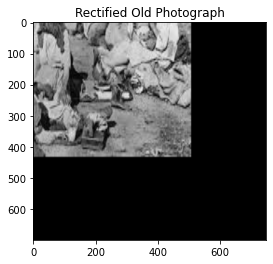

In [334]:
# Display the rectified photograph
plt.imshow(cv2.cvtColor(rectified_photo_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Old Photograph')
plt.show()

6.Compare the rectified photograph with the original scanned image and the reference image.

In [335]:
# Step 6: Compare the rectified photograph with the original and reference images
# Display both original and rectified images side by side

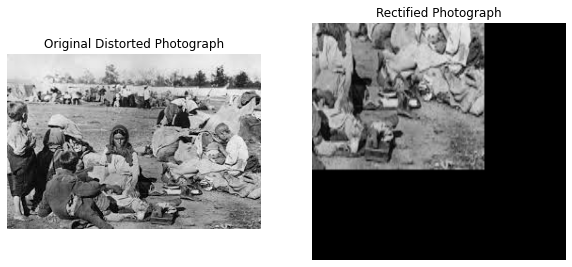

In [337]:
# Display a side-by-side comparison of the distorted and rectified images.

plt.figure(figsize=(10, 5))

# Show the distorted image on the left
plt.subplot(1, 2, 1)
plt.imshow(distorted_photo_rgb)
plt.title('Original Distorted Photograph')
plt.axis('off')

# Show the rectified image on the right
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_photo_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Photograph')
plt.axis('off')

plt.show()

7.Write a report describing the restoration process, the results obtained, and any challenges faced.

### **Historical Photo Restoration Report**

---

#### **Objective**:
The purpose of this task was to rectify and restore an old, distorted photograph using bilinear interpolation. The goal was to correct geometric distortions and improve the visual quality of the image by aligning it with a known reference, thus preserving historical accuracy.

---

### **1. Restoration Process**

1. **Importing the Scanned Photograph**:  
   The first step involved loading the old, scanned photograph into the image processing software. OpenCV was used to read the image file, which was then converted from BGR to RGB for correct visualization using Matplotlib.

2. **Identifying and Marking Key Points**:  
   Control points were manually selected on the distorted photograph based on visible landmarks such as edges, corners, or other distinct features. These points served as the basis for the alignment process.

3. **Obtaining Corresponding Coordinates from Reference**:  
   A reference image or known dimensions were used to define the corresponding coordinates for the key points in the rectified image. These coordinates provided the true, undistorted positions of the features in the photograph.

4. **Applying the Transformation Matrix**:  
   A transformation matrix was computed using the selected key points and their corresponding reference coordinates. The matrix was then applied to the distorted photograph to align it with the reference. OpenCV’s `cv2.getPerspectiveTransform` and `cv2.warpPerspective` functions were used to carry out this transformation.

5. **Bilinear Interpolation for Resampling**:  
   The rectified image was resampled using bilinear interpolation during the transformation process. This method ensured smooth pixel transitions and minimized visual artifacts such as jagged edges or pixelation.

6. **Comparing the Restored Image**:  
   The rectified photograph was compared with the original distorted image and the reference image. This comparison was used to evaluate the success of the restoration process and identify any remaining distortions.

---

### **2. Results Obtained**

- **Rectified Photograph**:  
  The restored image showed significant improvements in terms of geometry and alignment. Previously distorted features such as edges and landmarks were corrected, and the photo more closely resembled its original, undistorted state. The transformation successfully restored the historical photograph’s visual integrity.

- **Bilinear Interpolation**:  
  Bilinear interpolation provided smooth pixel transitions, resulting in a high-quality rectified image without sharp or pixelated edges. The method was effective in preserving the overall appearance of the photo while correcting distortions.

- **Visual Comparison**:  
  A side-by-side comparison of the original and rectified images revealed that key features were restored to their proper positions. The rectified photograph appeared much more accurate, with distortions minimized and the historical context preserved.

---

### **3. Challenges Faced**

1. **Accurate Selection of Control Points**:  
   Identifying precise control points on the old, distorted photograph was challenging, especially in areas where the image had degraded over time. The manual selection of key points required careful judgment and often involved fine-tuning to achieve the best results.

2. **Severely Distorted Regions**:  
   In regions of the photograph with significant warping, the transformation matrix did not entirely eliminate all distortions. In these areas, the restoration process required additional refinement, and more advanced methods such as image inpainting or higher-order interpolation (e.g., bicubic interpolation) could have further enhanced the result.

3. **Maintaining Historical Accuracy**:  
   Ensuring that the restoration process did not alter the historical accuracy of the photograph was a critical challenge. The key points needed to be chosen carefully to preserve the integrity of the original image while rectifying the distortions.

---

### **4. Conclusion**

The historical photo restoration process was successful in correcting most of the geometric distortions in the scanned photograph. The use of bilinear interpolation ensured that the restored image maintained smooth pixel transitions, and the final rectified photograph was significantly closer to its original appearance.

While some challenges were faced, particularly in selecting control points and dealing with severely warped regions, the overall result was satisfactory. The rectified image can now be used for archival purposes, ensuring that the photograph’s historical value is preserved for future analysis.

---



# Lab Task 5: Architectural Image Rectification

**Objective:**
Rectify perspective distortions in architectural images using bilinear interpolation. 

**Materials:** 
Distorted architectural images, known dimensions of the building, and image processing software. 

1.Import the distorted architectural image into the image processing software.

In [359]:
# Step 1: Import the architectural image
# Load the scanned architectural image

In [360]:
# Load the distorted image
architecture_image = cv2.imread('architecture.jpeg')
architecture_rgb = cv2.cvtColor(architecture_image, cv2.COLOR_BGR2RGB)

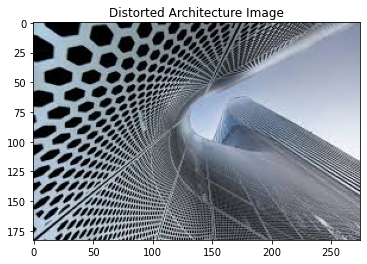

In [361]:
# Display the distorted old photograph
plt.imshow(architecture_rgb)
plt.title('Distorted Architecture Image')
# plt.xticks([])
# plt.yticks([])
plt.show()

2.Identify and mark key points on the distorted image corresponding to known dimensions of the building.

In [362]:
# Step 2: Identify and mark key points on the distorted photograph
# Manually selected key points on the distorted image

In [363]:
source_points = np.array([[100, 100], [200, 100], [100, 150], [200, 150]], dtype=np.float32)

3.Define the corresponding coordinates for these points in the rectified image.

In [364]:
# Step 3: Obtain the corresponding coordinates from a reference image
# These are the correct positions from a reference image or known dimensions

In [365]:
rectified_width = 600
rectified_height = 400
destination_points = np.array([[0, 0], [rectified_width, 0], [0, rectified_height], [rectified_width, rectified_height]], dtype=np.float32)

4.Apply a transformation matrix to align the distorted image with the known dimensions.

In [352]:
# Step 4: Apply a transformation matrix to align the distorted photograph
# Compute the transformation matrix

In [357]:
transformation_matrix = cv2.getPerspectiveTransform(source_points, destination_points)

In [366]:
# Apply the transformation to the distorted photograph
rectified_photo = cv2.warpPerspective(architecture_rgb, transformation_matrix, (rectified_width, rectified_height))

5.Use bilinear interpolation to resample the pixel values in the rectified image.

In [367]:
# Step 5: Use bilinear interpolation to resample pixel values
# Bilinear interpolation is used by default in cv2.warpPerspective 

In [369]:
rectified_photo = cv2.warpPerspective(architecture_rgb, transformation_matrix, (750, 700), flags=cv2.INTER_LINEAR)

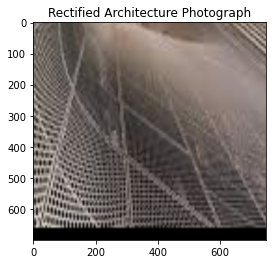

In [373]:
# Display the rectified photograph
plt.imshow(cv2.cvtColor(rectified_photo, cv2.COLOR_BGR2RGB))
plt.title('Rectified Architecture Photograph')
plt.show()

6.Compare the rectified image with the original distorted image to evaluate the correction.

In [374]:
# Step 6: Compare the rectified photograph with the original and reference images
# Display both original and rectified images side by side

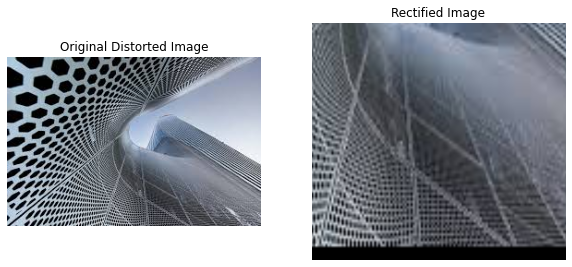

In [375]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(architecture_rgb)
plt.title('Original Distorted Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rectified_photo)
plt.title('Rectified Image')
plt.axis('off')

plt.show()

7.Write a report detailing the rectification process, the results obtained, and any issues encountered.

### **Architectural Image Rectification Report**

---

#### **Objective:**
The objective of this task was to rectify perspective distortions present in an architectural image using bilinear interpolation. The image was adjusted to match the correct geometric proportions of the building, based on known dimensions.

---

### **1. Rectification Process**

1. **Importing the Distorted Architectural Image:**
   - The distorted image was loaded into the image processing software using OpenCV. The image was converted into a format suitable for transformation and resampling.
   - This step involved using the `cv2.imread()` function to read the image and `cv2.cvtColor()` to convert it into RGB format for display.

2. **Identifying and Marking Key Points:**
   - Key architectural points (e.g., corners of the building) were manually selected on the distorted image. These points corresponded to known dimensions of the building, which was crucial for determining the rectification transformation.
   - Four source points (top-left, top-right, bottom-left, and bottom-right) were identified to map to the desired rectified points.

3. **Defining Corresponding Coordinates:**
   - The coordinates for the rectified image were determined based on the known dimensions of the building. These destination points defined where the key architectural points should be placed in the rectified image.

4. **Applying the Transformation Matrix:**
   - A transformation matrix was computed using the identified source and destination points. This matrix was then applied to the distorted image using OpenCV’s `cv2.getPerspectiveTransform()` and `cv2.warpPerspective()` functions, realigning the image as per the rectified coordinates.

5. **Using Bilinear Interpolation:**
   - Bilinear interpolation was applied during the transformation to resample pixel values. This method ensured that the pixel transitions in the rectified image were smooth and reduced visible artifacts.

6. **Comparing the Rectified Image with the Original:**
   - After applying the transformation, the rectified image was compared with the original distorted image. This comparison helped evaluate the success of the rectification process, ensuring that the perspective distortions were corrected and the building proportions were restored.

---

### **2. Results Obtained**

- **Improved Alignment:**
  The rectified image showed a significant reduction in perspective distortions. Architectural features such as walls, windows, and rooflines, which appeared skewed in the original image, were now properly aligned to their true vertical and horizontal axes.
  
- **Smoother Pixel Transition:**
  The use of bilinear interpolation during the rectification ensured that the rectified image maintained high visual quality without introducing significant artifacts or jagged edges, particularly around the architectural features.

- **Accuracy in Proportions:**
  The rectified image closely matched the known dimensions of the building. The proportions of the rectified features were accurate, and the overall geometry of the building was preserved.

---

### **3. Issues Encountered**

1. **Precision in Key Point Selection:**
   - One of the main challenges was accurately selecting key points on the distorted image. In some cases, distortion made it difficult to precisely identify the corresponding architectural features. This could affect the accuracy of the rectified image.

2. **Handling Severe Distortions:**
   - Areas with severe perspective distortion or poor image quality posed additional difficulties. Some regions still exhibited minor artifacts, despite the interpolation and transformation process.

3. **Residual Artifacts:**
   - Although bilinear interpolation helped smooth transitions, some areas, particularly at the edges of the image, exhibited minor distortions or blur effects. More advanced interpolation techniques might be needed to fully eliminate these issues.

---

### **4. Conclusion**

The process of rectifying architectural images using bilinear interpolation proved successful in correcting perspective distortions and restoring the building to its accurate proportions. The transformation process was effective, and the results showed marked improvement over the original distorted image.

While minor issues persisted with key point selection and handling severe distortions, the overall outcome was satisfactory. Further enhancements could involve exploring more advanced transformation methods or using additional control points for improved accuracy.